<a href="https://colab.research.google.com/github/min02yam/R-study/blob/main/20220529_%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D_%EB%8B%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------------------------------------------------------
#1. 다음은 어느 기업에서 부품의 지름이 실제로 납품서에 적혀있는 값과 동일한지 검사하기 위해 9개의 부품을 임의로 추출하여 지름을 측정한 결과로 얻은 값입니다.
##1-1. 위 표본의 모평균에 대한 95% 신뢰구간을 구하세요.
##1-2. 부품의 납품서에는 부품의 표준편차가 0.2cm라고 적혀있습니다. 이때 모평균에 대한 95% 신뢰구간을 구하세요.
----------------------------------------------------------------------------

# 1-1.
모집단의 분산을 모르므로 t분포 사용

In [ ]:
x<-c(12.5, 12.6, 12.5, 12.4, 12.6, 12.8, 12.3, 12.6)

In [ ]:
t.test(x, conf.level =0.95)


	One Sample t-test

data:  x
t = 235.48, df = 7, p-value = 6.576e-15
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 12.4116 12.6634
sample estimates:
mean of x 
  12.5375 


- 95 percent confidence interval: `(12.40835, 12.63609)`

# 1-2
모집단의 분산이 알려져 있으므로 정규분포 사용
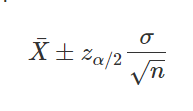

In [ ]:
n=8
alpha=0.05
q = qnorm(1-alpha/2) #오른쪽 꼬리 확률: Z_α/2
xbar=mean(x)
sigma=0.2

In [ ]:
lower_bound = xbar-q*sigma/sqrt(n)  # 신뢰구간 하한
upper_bound = xbar+q*sigma/sqrt(n)  # 신뢰구간 상한
round(c(lower_bound, upper_bound),4)

[1] 12.3989 12.6761

# 2. 음식에 포함된 콜레스테롤 함량이 음식의 종류와 어느 실험실에서 실험이 이루어졌는지에 따라 다르다고 할 수 있는지 유의수준 0.05하에서 검정하세요. 절차는 아래와 같습니다.

1) 가설설정

2) 검정통계량 값 혹은 유의확률 도출

3) 가설 기각 여부 결정

4) 해석

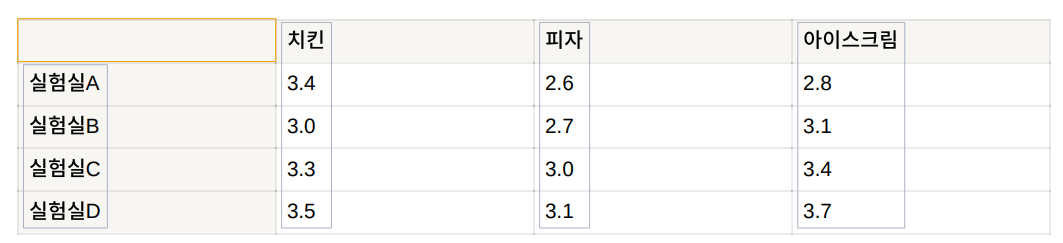

## ~~2-1. 데이터프레임 생성~~ 안씀

In [ ]:
library(dplyr)

In [ ]:
#벡터로 저장
vector<-c("치킨","A",3.4,"피자","A",2.6,"아이스크림","A",2.8,
      "치킨","B",3.0,"피자","B",2.7,"아이스크림","B",3.1,
      "치킨","C",3.3,"피자","C",3.0,"아이스크림","C",3.4,
      "치킨","D",3.5,"피자","D",3.1, "아이스크림","D",3.7)

In [ ]:
#메트릭스로 변환
matrix(vector,3,12)

치킨,피자,아이스크림,치킨,피자,아이스크림,치킨,피자,아이스크림,치킨,피자,아이스크림
A,A,A,B,B,B,C,C,C,D,D,D
3.4,2.6,2.8,3,2.7,3.1,3.3,3,3.4,3.5,3.1,3.7


In [ ]:
#행렬전환
matrix_t=matrix(vector,3,12) %>% t 
matrix_t

치킨,A,3.4
피자,A,2.6
아이스크림,A,2.8
치킨,B,3
피자,B,2.7
아이스크림,B,3.1
치킨,C,3.3
피자,C,3
아이스크림,C,3.4
치킨,D,3.5
피자,D,3.1


In [ ]:
#데이터프레임 생성
df=as.data.frame(matrix_t)
#열이름 지정
names(df)=c("food","lab","mat")
#확인
str(df)

'data.frame':	12 obs. of  3 variables:
 $ food: chr  "치킨" "피자" "아이스크림" "치킨" ...
 $ lab : chr  "A" "A" "A" "B" ...
 $ mat : chr  "3.4" "2.6" "2.8" "3" ...


In [ ]:
#검정을 위한 데이터 타입 변경
df$food<-as.factor(df$food)
df$lab<-as.factor(df$lab)
df$mat<-as.numeric(df$mat)

## ~~2-2. 가설검정~~ 역시안씀

1) 가설설정
- H_0: 음식 종류별 콜레스테롤 평균값이 모두 동일하다. (열의 평균들이 모두 동일하다)
- H_0: 실험실별로 콜레스테롤 평균값이 모두 동일하다. (행의 평균들이 모두 동일하다)
- H_0: 콜레스테롤 평균에 대해 음식과 실험실의 교호작용 효과가 없다. (두 요인 사이에 상효작용이 없다) -> (실험실의 종류가 변화함으로써 발생하는 콜레스테롤 측정값의 변화가 음식의 종류에 의해 영향을 받지 않음)

- H_A: 열의 콜레스테롤 평균들이 모두 동일하지는 않다. not H_0
- H_A: 행의 콜레스테롤 평균들이 모두 동일하지는 않다. not H_0
- H_A: 두 요인 사이에 상호작용이 존재한다. not H_O


2) 검정통계량 값 혹은 유의확률 도출

3) 가설 기각 여부 결정

4) 해석

In [ ]:
df

food,lab,mat
<fct>,<fct>,<dbl>
치킨,A,3.4
피자,A,2.6
아이스크림,A,2.8
치킨,B,3.0
피자,B,2.7
아이스크림,B,3.1
치킨,C,3.3
피자,C,3.0
아이스크림,C,3.4


In [ ]:
aov(mat~food*lab, data=df)

Call:
   aov(formula = mat ~ food * lab, data = df)

Terms:
                     food       lab  food:lab
Sum of Squares  0.4866667 0.5400000 0.2200000
Deg. of Freedom         2         3         6

Estimated effects may be unbalanced

In [ ]:
aov(mat~food*lab, data=df) %>%summary

            Df Sum Sq Mean Sq
food         2 0.4867 0.24333
lab          3 0.5400 0.18000
food:lab     6 0.2200 0.03667

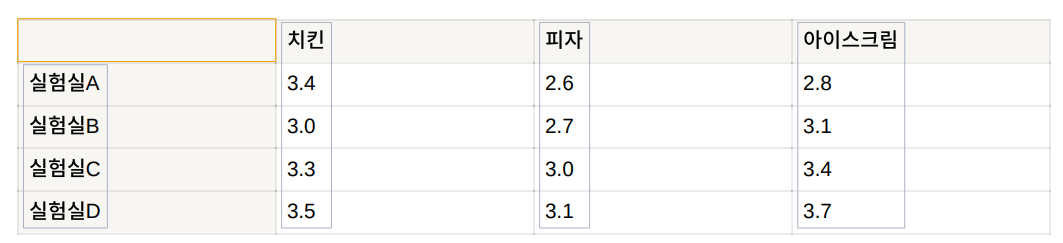

In [ ]:
#SSE= 합 (각각의 표본값 - 각 표본값이 속해있는 처리의 평균)^2
treat=c(3.4, 3.0, 3.3, 3.5, 2.6,2.7,3.0,3.1,2.8,3.1,3.4,3.7)
treat_mean=mean(treat)

In [ ]:
#함수만들기
sse=function(x){
  x-treat_mean
}

In [ ]:
#함수적용
sapply(treat,sse) **2

[1] 0.071111111 0.017777778 0.027777778 0.134444444 0.284444444 0.187777778
 [7] 0.017777778 0.001111111 0.111111111 0.001111111 0.071111111 0.321111111

In [ ]:
sapply(treat,sse) **2 %>%sum #값확인

[1] 1.246667

In [ ]:
#값 할당
sse=sapply(treat,sse) **2 %>%sum

In [ ]:
#MSE=SSE/df
#이때, df=(r-1)(c-1) , (행갯수-1)*(컬럼개수-1)
d=2*3
mse=sse/d

In [ ]:
aov(mat~food+lab, data=df) %>% summary() 

            Df Sum Sq Mean Sq F value Pr(>F)  
food         2 0.4867 0.24333   6.636 0.0302 *
lab          3 0.5400 0.18000   4.909 0.0469 *
Residuals    6 0.2200 0.03667                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
aov(mat~food:lab, data=df) %>% summary()

            Df Sum Sq Mean Sq
food:lab    11  1.247  0.1133

In [ ]:
aov(mat~food*lab, data=df) %>%summary()

            Df Sum Sq Mean Sq
food         2 0.4867 0.24333
lab          3 0.5400 0.18000
food:lab     6 0.2200 0.03667

In [ ]:
#food의 F통계량값 = MSTR/MSE
MSTR_food=0.24333 
F_food=MSTR_food/mse
#lab의 F통계량값
MSTR_lab=0.18000
F_lab=MSTR_lab/mse
#상호작용의 F통계량값
MSTR_inter=0.03667
F_inter=MSTR_inter/mse

In [ ]:
round(c(F_food,F_lab,F_inter),3)

[1] 1.171 0.866 0.176

In [ ]:
#food의 F통계량값 qf(누적확률,분자자유도,분모자유도)
qf(0.95,2,d)
#lab의 F통계량값 
qf(0.95,3,d)
#상호작용의 F통계량값
qf(0.95,6,d)

[1] 5.143253

[1] 4.757063

[1] 4.283866

-셋 모두 검정통계량의 값이 THRESHOLD값보다 작음 -> 기각X 

1) 가설설정
- H_0: 음식 종류별 콜레스테롤 평균값이 모두 동일하다. (열의 평균들이 모두 동일하다)
- H_0: 실험실별로 콜레스테롤 평균값이 모두 동일하다. (행의 평균들이 모두 동일하다)
- H_0: 콜레스테롤 평균에 대해 음식과 실험실의 교호작용 효과가 없다. (두 요인 사이에 상효작용이 없다) -> (실험실의 종류가 변화함으로써 발생하는 콜레스테롤 측정값의 변화가 음식의 종류에 의해 영향을 받지 않음)

- H_A: 열의 콜레스테롤 평균들이 모두 동일하지는 않다. not H_0
- H_A: 행의 콜레스테롤 평균들이 모두 동일하지는 않다. not H_0
- H_A: 두 요인 사이에 상호작용이 존재한다. not H_O


2) 검정통계량 값 혹은 유의확률 도출
- 음식에 대한 검정통계량의 값이 1.171로 F값 5.14보다 작다.
- 실험실에 대한 검정통계량의 값이 0.866로 F값 4.75보다 작다.
- 상호작용대 대한 검정통계량의 값이 0.176로 F값 4.28보다 작다.

3) 가설 기각 여부 결정
그러므로 유의수준 0.05하에서는
- 귀무가설을 기각할 근거가 부족하다.
- 귀무가설을 기각할 근거가 부족하다.
- 귀무가설을 기각할 근거가 부족하다.

4) 해석
즉, 유의수즌 0.05하에서는 **통계적**으로
- 음식 종류 별 콜레스테롤의 값이 동일하다고 할 수 있고
- 실험실별 콜레스테롤 값이 모두 동일하다고 할 수 있고
- 콜레스테롤 값에 대한 음식과 실험실의 교호작용 효과가 없다고 할 수 있음

------------------------------------------
다시


In [ ]:
install.packages("car")
library(car)

In [ ]:

lm(mat~food*lab, data=df) %>%anova

Warning message in anova.lm(.):
“ANOVA F-tests on an essentially perfect fit are unreliable”


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
food,2,0.4866667,0.24333333,NaN,NaN
lab,3,0.5400000,0.18000000,NaN,NaN
food:lab,6,0.2200000,0.03666667,NaN,NaN
Residuals,0,0.0000000,NaN,NA,NA


# ✅다시 ✅

멜트로 다시 하기 

In [ ]:
library(reshape2)